## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [1]:
!pip install pandas_datareader

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

Text(0.5, 1.0, 'Изменение среднего рейтинга трёх рецептов')

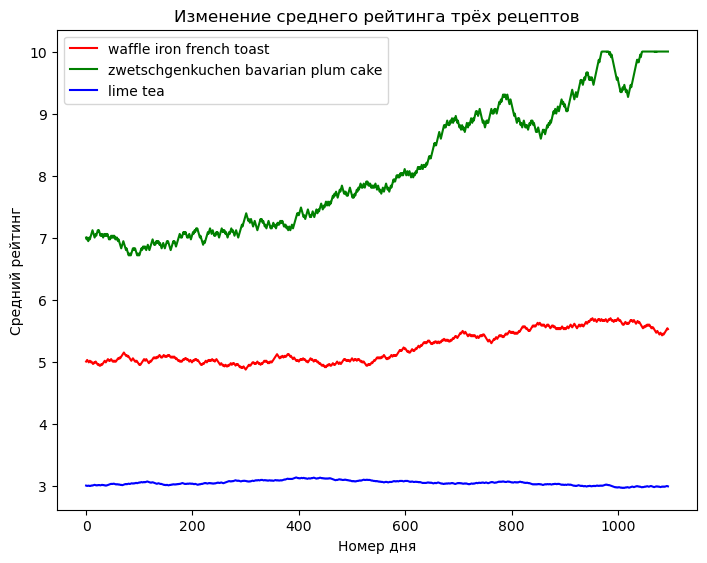

In [25]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
%matplotlib inline

ratings = np.load('average_ratings.npy')
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.1, 1, 1])
dt1 = datetime.date(2019, 1, 1)
dt2 = datetime.date(2021, 12, 30)
delta = dt2 - dt1
line1, = ax1.plot(range(delta.days+1), ratings[0], 'r', label = 'waffle iron french toast')
line2, = ax1.plot(range(delta.days+1), ratings[1], 'g', label = 'zwetschgenkuchen bavarian plum cake')
line3, = ax1.plot(range(delta.days+1), ratings[2], 'b', label = 'lime tea')


ax1.set_xlabel('Номер дня')
ax1.set_ylabel('Средний рейтинг')
ax1.legend(handles = [line1, line2, line3])
ax1.set_title('Изменение среднего рейтинга трёх рецептов')

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


Text(0.5, 1.0, 'Изменение среднего рейтинга трёх рецептов')

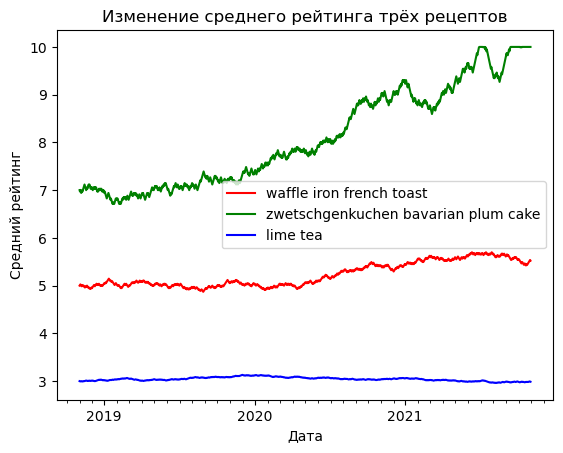

In [26]:
fig, ax2 = plt.subplots()
diap = pd.date_range(start = '2019-01-01', end = '2021-12-30')
line1, = ax2.plot(diap, ratings[0], 'r', label = 'waffle iron french toast')
line2, = ax2.plot(diap, ratings[1], 'g', label = 'zwetschgenkuchen bavarian plum cake')
line3, = ax2.plot(diap, ratings[2], 'b', label = 'lime tea')
ax2.xaxis.set_major_locator(mdates.MonthLocator(bymonth = 3))
ax2.xaxis.set_minor_locator(mdates.MonthLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax2.set_xlabel('Дата')
ax2.set_ylabel('Средний рейтинг')
ax2.legend(handles = [line1, line2, line3])
ax2.set_title('Изменение среднего рейтинга трёх рецептов')

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

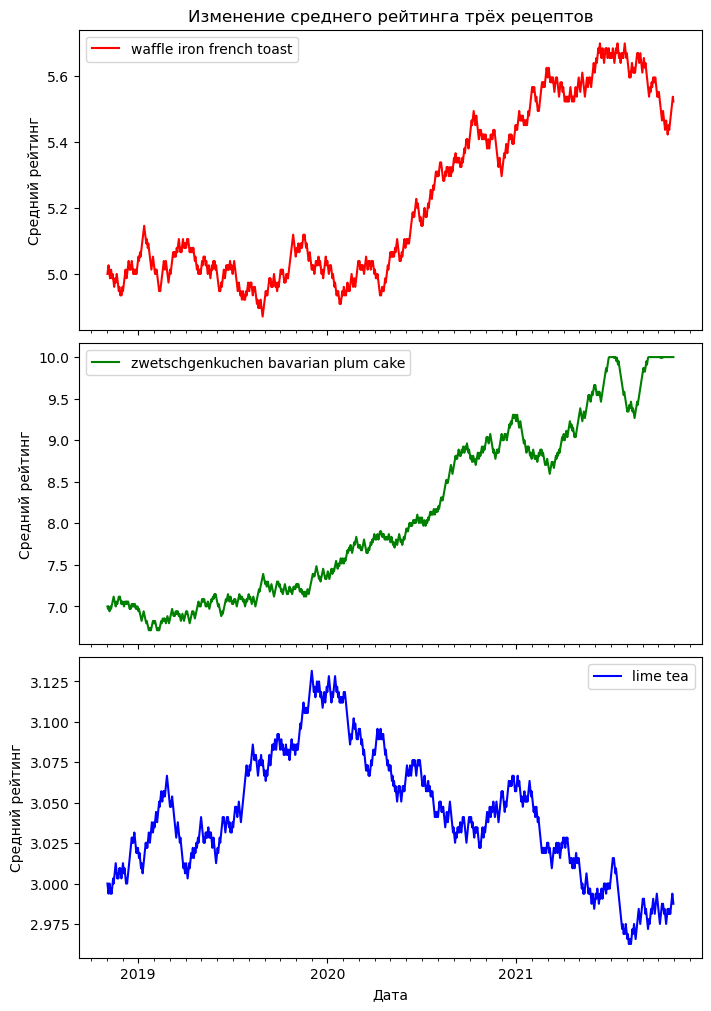

In [27]:
fig, (ax31, ax32, ax33) = plt.subplots(nrows=3, ncols=1, figsize = (7, 10), layout="constrained", sharex='col')
ax31.set_ylabel('Средний рейтинг')
line31, = ax31.plot(diap, ratings[0], 'r')
ax31.xaxis.set_major_locator(mdates.MonthLocator(bymonth = 3))
ax31.xaxis.set_minor_locator(mdates.MonthLocator())
ax31.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax31.legend(['waffle iron french toast'])
ax31.set_title('Изменение среднего рейтинга трёх рецептов')
ax32.set_ylabel('Средний рейтинг')
line32, = ax32.plot(diap, ratings[1], 'g')
ax32.xaxis.set_major_locator(mdates.MonthLocator(bymonth = 3))
ax32.xaxis.set_minor_locator(mdates.MonthLocator())
ax32.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax32.legend(['zwetschgenkuchen bavarian plum cake'])
ax33.set_ylabel('Средний рейтинг')
ax33.set_xlabel('Дата')
line33, = ax33.plot(diap, ratings[2], 'b')
ax33.xaxis.set_major_locator(mdates.MonthLocator(bymonth = 3))
ax33.xaxis.set_minor_locator(mdates.MonthLocator())
ax33.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax33.legend(['lime tea'])

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


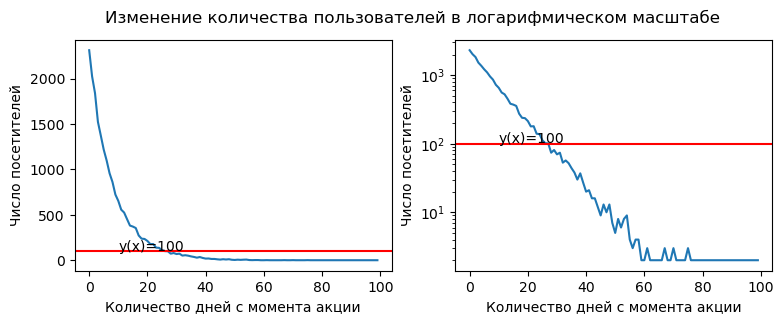

In [28]:
visitors = np.load('visitors.npy')
fig = plt.figure(figsize = (9,3))
ax41 = fig.add_subplot(1, 2, 1)

ax42 = fig.add_subplot(1, 2, 2)
# Создание первого графика с линейными осями
ax41.plot(visitors)
ax41.set_xlabel('Количество дней с момента акции')
ax41.set_ylabel('Число посетителей')
ax41.axhline(y=100, color='r')
ax41.annotate('y(x)=100', xy=(10, 102))

# Создание второго графика с логарифмической вертикальной осью
ax42.semilogy(visitors)
ax42.set_xlabel('Количество дней с момента акции')
ax42.set_ylabel('Число посетителей')
ax42.axhline(y=100, color='r')
ax42.annotate('y(x)=100', xy=(10, 102))
plt.suptitle('Изменение количества пользователей в логарифмическом масштабе')
# Показать обе фигуры
plt.show()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [29]:
reviews = pd.read_csv('reviews_sample.csv', delimiter = ',')
recipes = pd.read_csv('recipes_sample.csv', delimiter = ',')

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

Text(0.5, 1.0, 'Размеры групп рецептов')

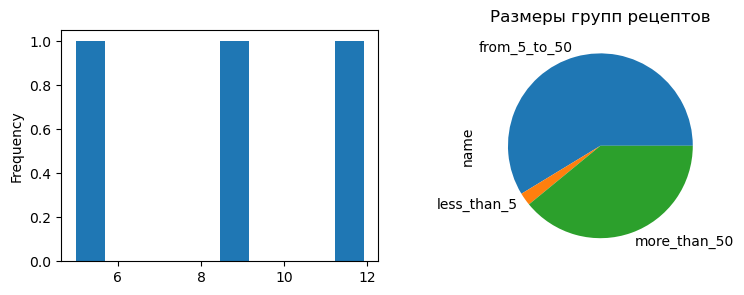

In [30]:
def f(row):
    if int(row) < 5:
        val = 'less_than_5'
    elif 5 <= row < 50:
        val = 'from_5_to_50'
    else:
        val = 'more_than_50'
    return val

recipes_t5 = recipes
recipes_t5.loc[:, 'minutes'] = recipes_t5.minutes.apply(f)
first_r = recipes_t5.groupby('minutes')['n_steps'].mean()
second_r = recipes_t5.groupby('minutes')['name'].count()
final_r = pd.concat([first_r, second_r], axis = 1)
fig = plt.figure(figsize = (9,3))
hist = fig.add_subplot(1, 2, 1)
final_r['n_steps'].plot(ax=hist, kind = 'hist', y = 'n_steps')
pie = fig.add_subplot(1, 2, 2)
second_r.plot(ax=pie, kind = 'pie')
pie.set_title('Размеры групп рецептов')

Text(0.5, 0.98, 'Гистограммы рейтинга отзывов в 2008 и 2009 годах')

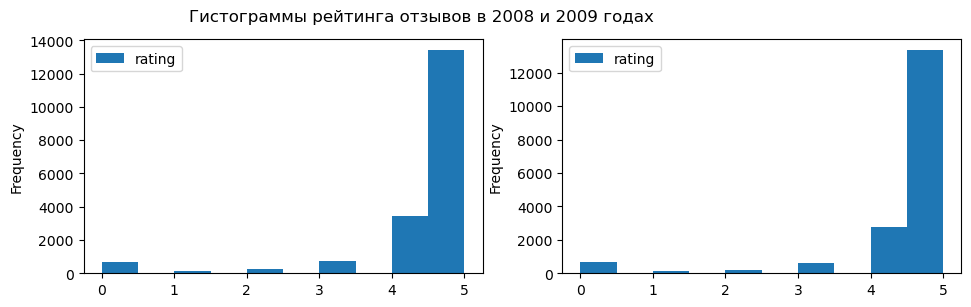

In [31]:
rev_08 = reviews.query("'2008-01-01' <= date <= '2008-12-31'")
rev_09 = reviews.query("'2009-01-01' <= date <= '2009-12-31'")
fig = plt.figure(figsize = (9,3))
ax0 = fig.add_subplot(1, 2, 1)

ax1 = fig.add_subplot(1, 2, 2)

rev_08.plot.hist(ax = ax0, y = 'rating')
rev_09.plot.hist(ax = ax1, y = 'rating')
plt.subplots_adjust(bottom=0.1, right=1.1)
plt.suptitle("Гистограммы рейтинга отзывов в 2008 и 2009 годах")

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

<AxesSubplot:title={'center':'Диаграмма рассеяния n_steps и n_ingredients'}, xlabel='n_steps', ylabel='n_ingredients'>

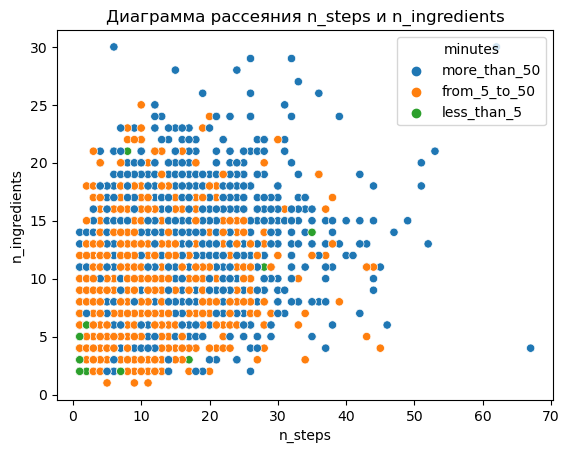

In [32]:
import seaborn as sns
sns_t7 = sns.scatterplot(data = recipes_t5, x = 'n_steps', y = 'n_ingredients', hue = 'minutes')
sns_t7.set_title('Диаграмма рассеяния n_steps и n_ingredients')
sns_t7

Линейной зависимости между двумя переменными не наблюдается.

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

<AxesSubplot:title={'center':'Корреляционная матрица числовых столбцов таблиц recipes и reviews'}>

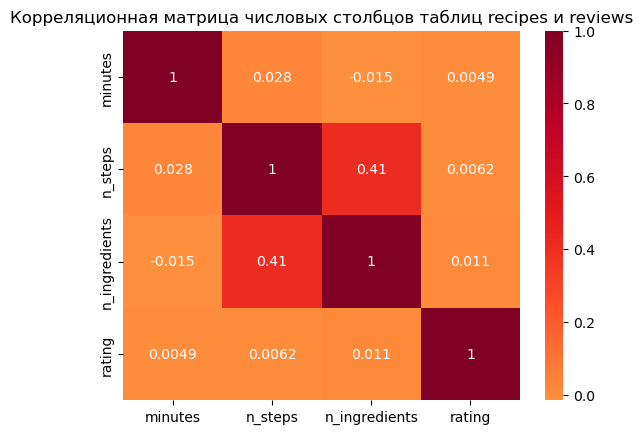

In [33]:
rec_t8 = pd.read_csv('recipes_sample.csv')
df_t8 = pd.concat([rec_t8, reviews], axis = 1)
sns_t8 = sns.heatmap(df_t8[['minutes', 'n_steps', 'n_ingredients', 'rating']].corr(), cmap = 'YlOrRd', center = 0.0, annot = True)
sns_t8.set_title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')
sns_t8